In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

%matplotlib inline

In [137]:
# Open the data
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  82 non-null     int64  
 1   gender                  82 non-null     int64  
 2   age                     82 non-null     int64  
 3   family                  82 non-null     int64  
 4   education               81 non-null     float64
 5   years_of_service        80 non-null     float64
 6   salary                  82 non-null     int64  
 7   sat_management          82 non-null     int64  
 8   sat_colleques           81 non-null     float64
 9   sat_workingEnvironment  82 non-null     int64  
 10  sat_salary              82 non-null     int64  
 11  sat_tasks               82 non-null     int64  
 12  healtcare               47 non-null     float64
 13  holidayCabin            20 non-null     float64
 14  gym                     9 non-null      floa

In [139]:
# Count the number of male (1) and female (2) workers
gender_count = df['gender'].value_counts().reindex([1, 2], fill_value=0)

# Calculate the percentage of each gender
gender_percentage = (gender_count / gender_count.sum()) * 100

# Rename the index to reflect 1 as "Men" and 2 as "Women"
gender_percentage.index = ['Men', 'Women']

# Print the gender percentages
print("Gender Percentages:")
print(gender_percentage)


Gender Percentages:
Men      76.829268
Women    23.170732
Name: count, dtype: float64


In [140]:
# Define age bins and labels for the age ranges
age_bins = [18, 30, 42, 54, 66]  
age_labels = ['18-30', '30-42', '42-54', '54-66']

# Create a new column 'age_group' based on the age bins
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Count the number of workers in each age group
age_group_count = df['age_group'].value_counts(sort=False)

# Print the counts
print("Age Group Count:")
print(age_group_count)


Age Group Count:
age_group
18-30    17
30-42    39
42-54    19
54-66     7
Name: count, dtype: int64


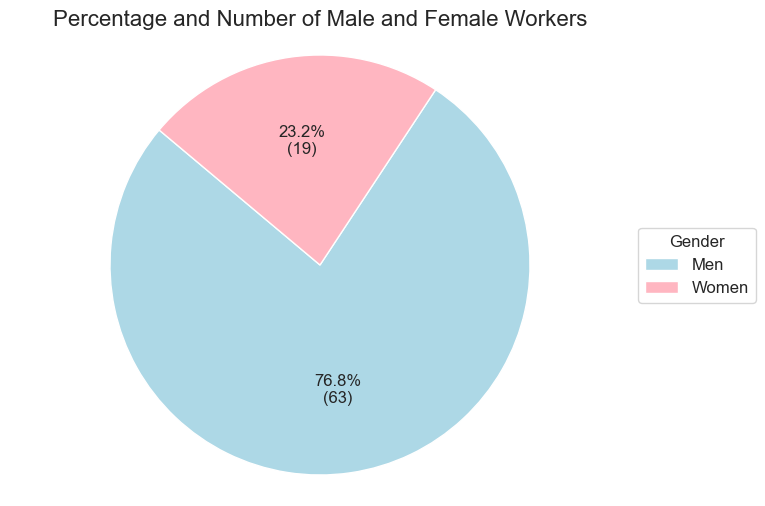

In [141]:
# Plotting a pie chart for gender percentages
plt.figure(figsize=(8, 6))

# Create the pie chart with custom label positions
wedges, texts, autotexts = plt.pie(gender_percentage, 
                                   labels=None, 
                                   autopct='%1.1f%%', 
                                   startangle=140, 
                                   colors=['lightblue', 'lightpink'])

# Loop through autotexts to add numerical values to the pie chart
for i, autotext in enumerate(autotexts):
    percentage_text = autotext.get_text() 
    numerical_value = int(gender_count.iloc[i]) 
    autotext.set_text(f'{percentage_text}\n({numerical_value})')  
    autotext.set_fontsize(12) 

# Draw the lines connecting the labels to the pie slices
for i, text in enumerate(texts):
    text.set_color(wedges[i].get_facecolor())  
    text.set_fontsize(12)  # Adjust font size for labels
    text.set_position((text.get_position()[0] * 1.15, text.get_position()[1] * 1.15))  

# Add labels to the pie chart
plt.legend(wedges, gender_percentage.index, title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

# Set the title
plt.title('Percentage and Number of Male and Female Workers', fontsize=16)
plt.axis('equal') 

plt.show()


There seems to be a lot less women as employees. 

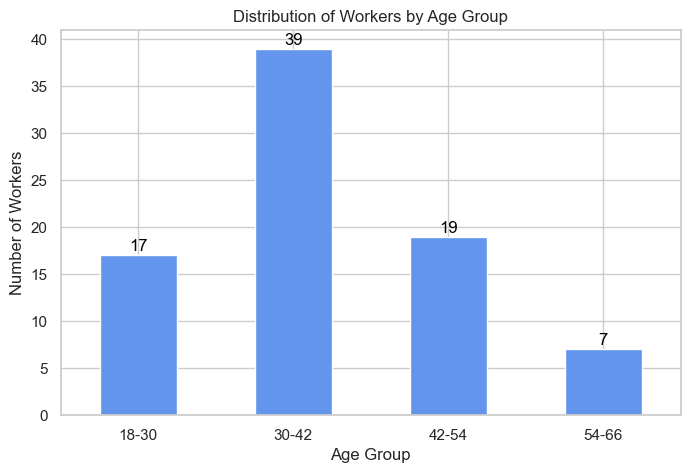

In [142]:
plt.figure(figsize=(8, 5))
ax = age_group_count.plot(kind='bar', color='cornflowerblue')  
plt.title('Distribution of Workers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Workers')
plt.xticks(rotation=0)

# Add labels on bars
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3), textcoords='offset points')

plt.show()



Age Group and Gender Distribution:
gender      1   2
age_group        
18-30      16   1
30-42      28  11
42-54      14   5
54-66       5   2


C:\Users\leski\AppData\Local\Temp\ipykernel_7848\1174098911.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_group = df.groupby(['age_group', 'gender']).size().unstack(fill_value=0)
C:\Users\leski\AppData\Local\Temp\ipykernel_7848\1174098911.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_group = df.groupby(['age_group', 'gender']).size().unstack(fill_value=0)


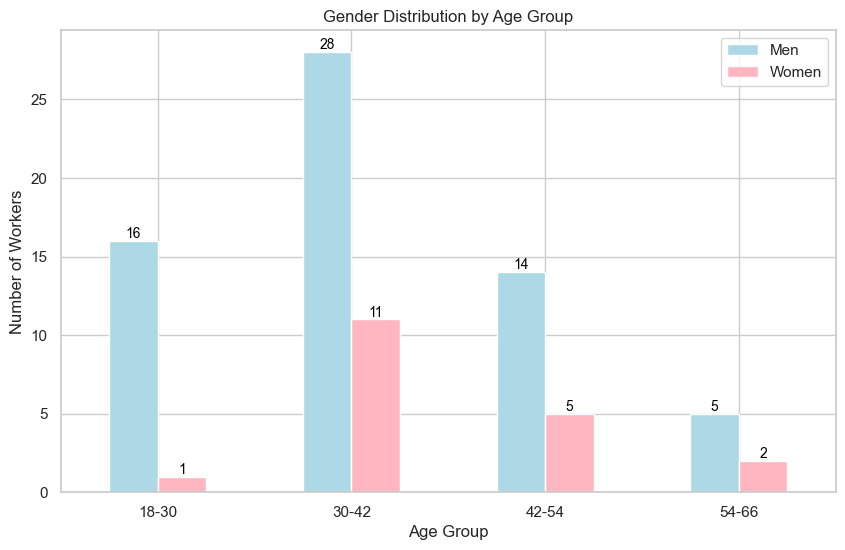

In [143]:
# Group by age group and gender, then count
age_gender_group = df.groupby(['age_group', 'gender']).size().unstack(fill_value=0)

# Print the table to see how many males and females are in each age group
print("Age Group and Gender Distribution:")
print(age_gender_group)

# Group by age group and gender, then count
age_gender_group = df.groupby(['age_group', 'gender']).size().unstack(fill_value=0)

# Plot the age group and gender distribution as a grouped bar chart
ax = age_gender_group.plot(kind='bar', color=['lightblue', 'lightpink'], figsize=(10, 6), position=0.5)
plt.title('Gender Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Workers')
plt.xticks(rotation=0)

# Adjust the legend to correctly reflect 1 = Male and 2 = Female
plt.legend(['Men', 'Women'])

# Add labels on bars for both genders
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black')

plt.show()

Most employees are under 42 years old.

In [144]:
print(df['sat_salary'].isnull().sum())
print(df['sat_salary'].describe())

0
count    82.000000
mean      2.109756
std       1.111179
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: sat_salary, dtype: float64


In [145]:
# Check the minimum and maximum salary to adjust the bins properly
min_salary = df['salary'].min()
max_salary = df['salary'].max()

print(f"Minimum Salary: {min_salary}")
print(f"Maximum Salary: {max_salary}")


Minimum Salary: 1521
Maximum Salary: 6278


Average Salary Satisfaction by Salary Group and Gender:
gender               1         2
salary_group                    
1500-3000     1.700000  2.789474
3000-4000     2.375000       NaN
4000-5000     3.000000       NaN
5000-6300     3.333333       NaN


C:\Users\leski\AppData\Local\Temp\ipykernel_7848\678824822.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_satisfaction_group = df.groupby(['salary_group', 'gender'])['sat_salary'].mean().unstack()


<Figure size 1000x600 with 0 Axes>

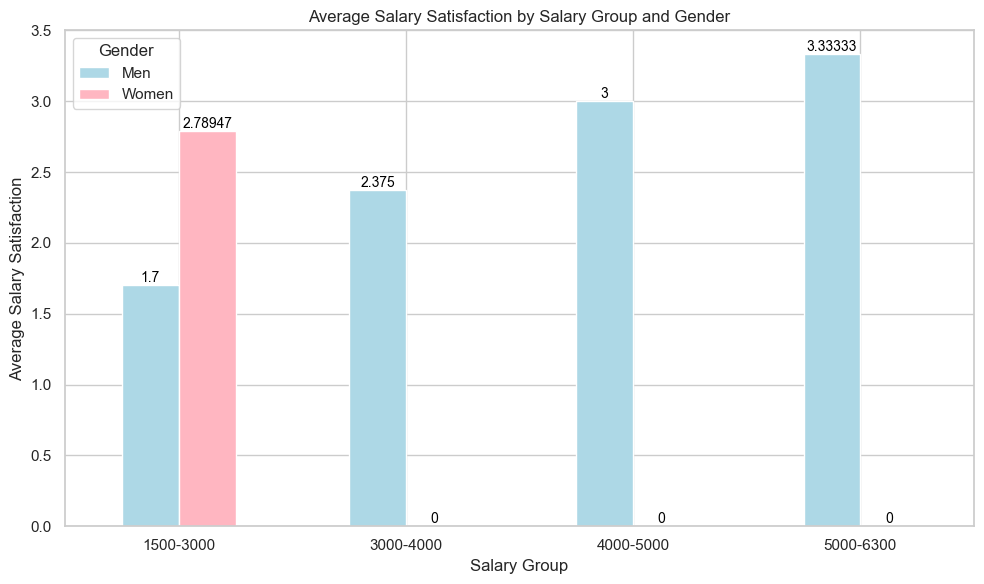

In [146]:
# Adjust salary bins to fit the actual salary range
salary_bins = [1500, 3000, 4000, 5000, 6300]  # Salary bins adjusted to the actual salary range
salary_labels = ['1500-3000', '3000-4000', '4000-5000', '5000-6300']  # Labels for the salary groups

# Create a new column 'salary_group' based on the salary bins
df['salary_group'] = pd.cut(df['salary'], bins=salary_bins, labels=salary_labels, right=False, include_lowest=True)

# Group by salary group and gender, and calculate the mean satisfaction with salary
salary_satisfaction_group = df.groupby(['salary_group', 'gender'])['sat_salary'].mean().unstack()

# Print the result to check the data
print("Average Salary Satisfaction by Salary Group and Gender:")
print(salary_satisfaction_group)

# Plot the grouped bar chart for salary satisfaction
plt.figure(figsize=(10, 6))
ax = salary_satisfaction_group.plot(kind='bar', color=['lightblue', 'lightpink'], figsize=(10, 6))

# Set plot labels and title
plt.title('Average Salary Satisfaction by Salary Group and Gender')
plt.xlabel('Salary Group')
plt.ylabel('Average Salary Satisfaction')
plt.xticks(rotation=0)

# Adjust the legend to correctly reflect 1 = Men and 2 = Women
plt.legend(['Men', 'Women'], title='Gender')

# Add labels on bars for better readability
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black')

plt.tight_layout()
plt.show()


**Satisfaction was measured on a scale from 1-5.**\
**1=very unsatisfied 5=very satisfied**\
Women seem to be more satisfied with their salaries than men, but they are not in the highest paying groups.\
Highest salary group seems to be most satisfied as one could assume. 

Average Salary by Age Group:
age_group
18-30    2422.000000
30-42    2427.358974
42-54    2723.368421
54-66    3236.142857
Name: salary, dtype: float64


C:\Users\leski\AppData\Local\Temp\ipykernel_7848\3098390462.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_salary_group = df.groupby('age_group')['salary'].mean()


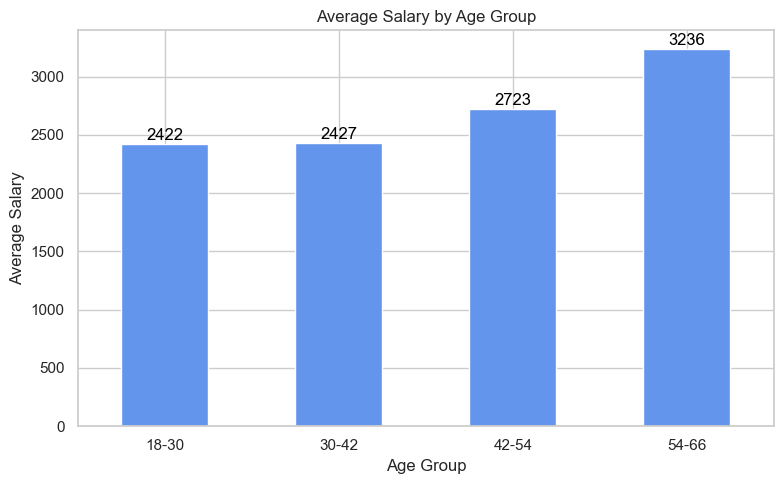

In [147]:
# Group by age group and calculate the average salary
age_salary_group = df.groupby('age_group')['salary'].mean()

# Print the result to see the average salary by age group
print("Average Salary by Age Group:")
print(age_salary_group)

# Plot the average salary by age group
plt.figure(figsize=(8, 5))
ax = age_salary_group.plot(kind='bar', color='cornflowerblue')

# Set plot labels and title
plt.title('Average Salary by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)

# Add labels on bars for better readability
for i in ax.patches:
    ax.annotate(f'{i.get_height():.0f}', (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3), textcoords='offset points')

plt.tight_layout()
plt.show()


Salary seems to be somewhat tied to age, maybe age is correlated to years of service. 

In [148]:
# Count how many employees answered each value for salary satisfaction
sat_salary_counts = df['sat_salary'].value_counts().sort_index()

# Display the result
print(sat_salary_counts)


sat_salary
1    33
2    19
3    19
4    10
5     1
Name: count, dtype: int64


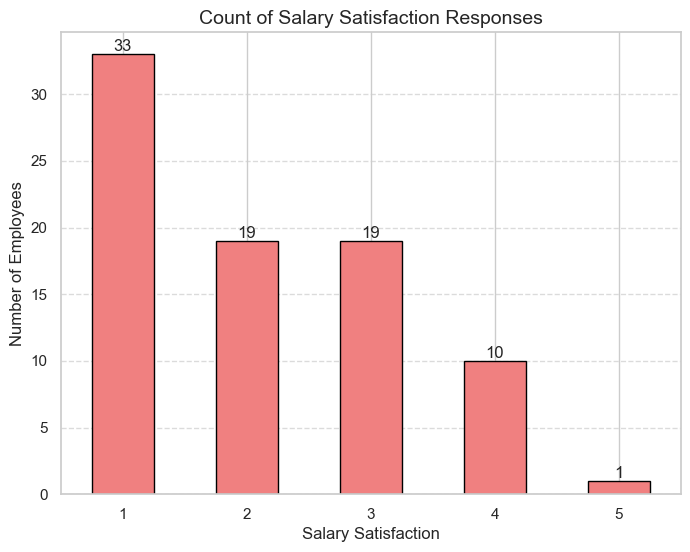

In [149]:
# Plotting the count of salary satisfaction responses as a bar chart
plt.figure(figsize=(8, 6))
bars = sat_salary_counts.plot(kind='bar', color='lightcoral', edgecolor='black')

# Adding value labels on top of each bar
for bar in bars.patches:
    plt.annotate(
        bar.get_height(),  # Height of the bar
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position for the label
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=12  # Font size for the label
    )

plt.title('Count of Salary Satisfaction Responses', fontsize=14)
plt.xlabel('Salary Satisfaction', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


C:\Users\leski\AppData\Local\Temp\ipykernel_7848\3815882712.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sat_salary = df.groupby('age_group')['sat_salary'].mean()


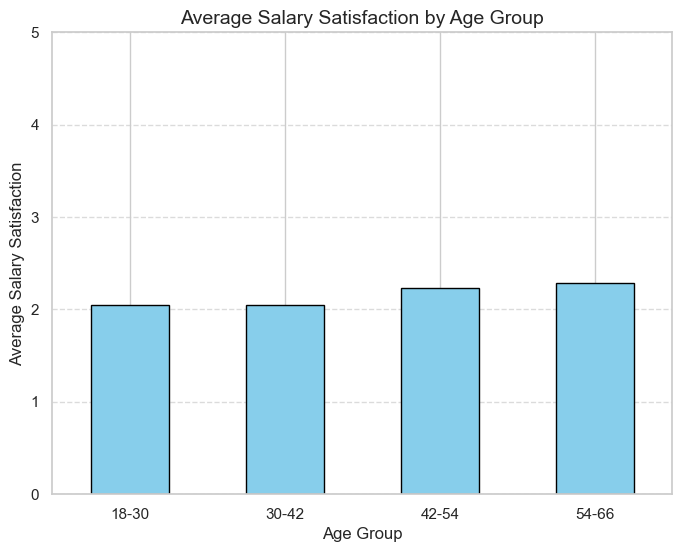

In [150]:
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Calculate average salary satisfaction per age group
avg_sat_salary = df.groupby('age_group')['sat_salary'].mean()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
avg_sat_salary.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Salary Satisfaction by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Salary Satisfaction', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [151]:
# Count the number of responses for salary satisfaction by age group
sat_salary_counts_by_age = df.groupby('age_group')['sat_salary'].value_counts().unstack(fill_value=0)

# Display the counts
print("Salary Satisfaction Counts by Age Group:")
print(sat_salary_counts_by_age)


Salary Satisfaction Counts by Age Group:
sat_salary   1  2   3  4  5
age_group                  
18-30        9  3   6  2  0
30-42       16  8  10  4  0
42-54        5  6   3  3  0
54-66        3  2   0  1  1


C:\Users\leski\AppData\Local\Temp\ipykernel_7848\1951126527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sat_salary_counts_by_age = df.groupby('age_group')['sat_salary'].value_counts().unstack(fill_value=0)


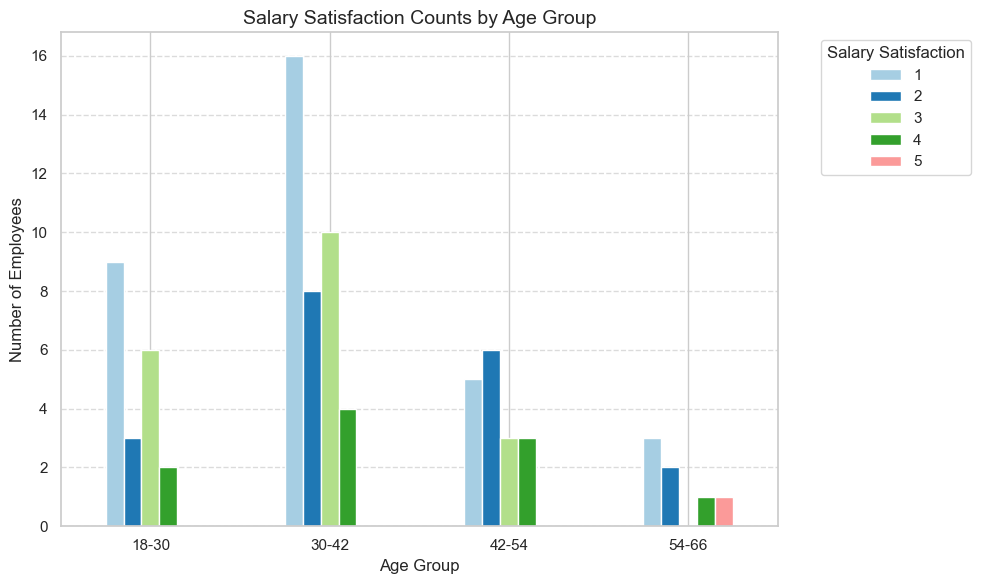

In [152]:
# Plotting the count of salary satisfaction responses by age group as a grouped bar chart
sat_salary_counts_by_age.plot(kind='bar', figsize=(10, 6), color=plt.cm.Paired.colors)

plt.title('Salary Satisfaction Counts by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Salary Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


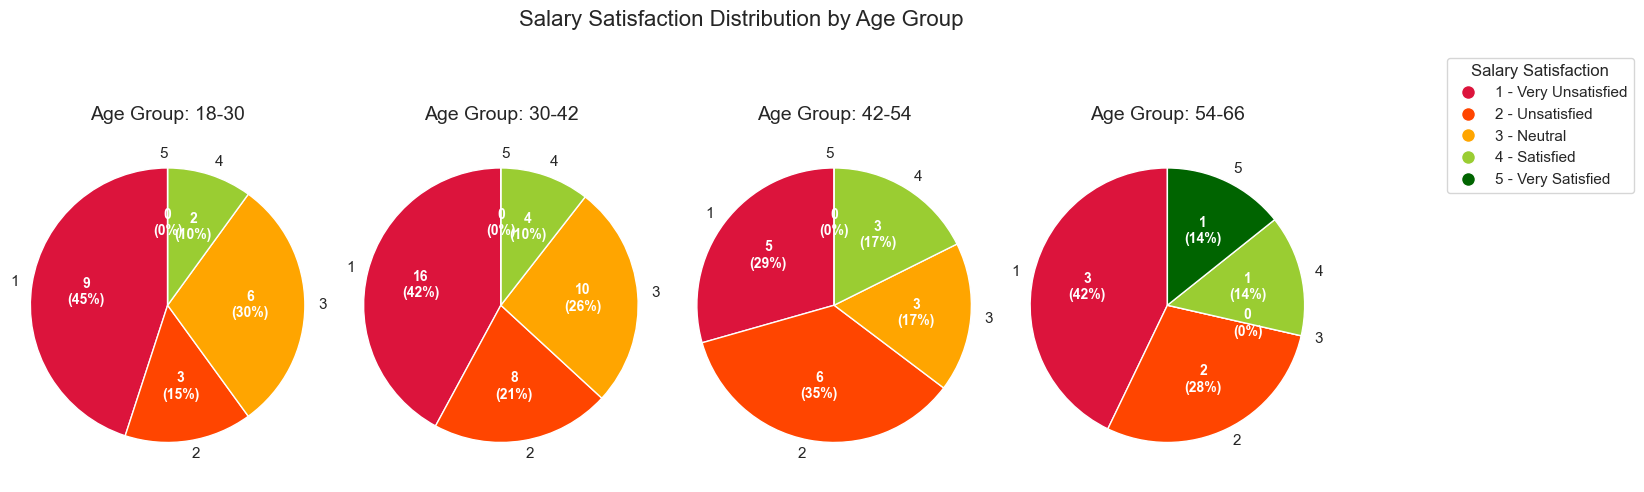

In [153]:
# Define custom colors for each satisfaction level
custom_colors = ['crimson', 'orangered', 'orange', 'yellowgreen', 'darkgreen']
satisfaction_labels = ['1 - Very Unsatisfied', '2 - Unsatisfied', '3 - Neutral', '4 - Satisfied', '5 - Very Satisfied']

# Plotting pie charts for each age group
num_age_groups = sat_salary_counts_by_age.shape[0]
fig, axes = plt.subplots(1, num_age_groups, figsize=(15, 5), subplot_kw=dict(aspect="equal"))

# Add a title for the entire figure
fig.suptitle('Salary Satisfaction Distribution by Age Group', fontsize=16)

# Create a pie chart for each age group
for ax, (age_group, counts) in zip(axes, sat_salary_counts_by_age.iterrows()):
    wedges, texts, autotexts = ax.pie(
        counts, 
        labels=counts.index, 
        autopct=lambda p: f'{int(p * sum(counts) / 100)}\n({int(p)}%)', 
        startangle=90, 
        colors=custom_colors
    )
    ax.set_title(f'Age Group: {age_group}', fontsize=14)
    plt.setp(autotexts, size=10, weight="bold", color="white")
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a compact legend using the built-in legend functionality
# Create custom handles for the legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in custom_colors]
# Add the legend to the figure
fig.legend(handles, satisfaction_labels, title='Salary Satisfaction', loc='upper right', bbox_to_anchor=(1.1, 0.9))  # Adjusted position

plt.tight_layout(rect=[0, 0, 0.9, 0.9])  # Adjust layout to make room for the title and legend
plt.show()
